### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# <font color='blue'> Project 3 : Buzz Prediction on Twitter
#### Classification task: Prediction of buzz value for Twitter-Absolute-Sigma-500.Data dataset. 




In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import metrics

In [4]:
import os
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Dropout
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import auc

In [7]:
from sklearn.decomposition import PCA

In [8]:
import tensorflow as tf

In [8]:
def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

In [9]:
data=pd.read_csv("Twitter-Absolute-Sigma-500.data",
           skipinitialspace=True,header=None,names = ["NCD_0","NCD_1","NCD_2","NCD_3","NCD_4","NCD_5","NCD_6","AI_0","AI_1","AI_2","AI_3","AI_4","AI_5","AI_6","AS(NA)_0","AS(NA)_1","AS(NA)_2","AS(NA)_3","AS(NA)_4","AS(NA)_5","AS(NA)_6","BL_0","BL_1","BL_2","BL_3","BL_4","BL_5","BL_6","NAC_0","NAC_1","NAC_2","NAC_3","NAC_4","NAC_5","NAC_6","AS(NAC)_0","AS(NAC)_1","AS(NAC)_2","AS(NAC)_3","AS(NAC)_4","AS(NAC)_5","AS(NAC)_6","CS_0","CS_1","CS_2","CS_3","CS_4","CS_5","CS_6","AT_0","AT_1","AT_2","AT_3","AT_4","AT_5","AT_6","NA_0","NA_1","NA_2","NA_3","NA_4","NA_5","NA_6","ADL_0","ADL_1","ADL_2","ADL_3","ADL_4","ADL_5","ADL_6","NAD_0","NAD_1","NAD_2","NAD_3","NAD_4","NAD_5","NAD_6","BUZZ"])

###### Exploratory Analysis

In [6]:
data.shape

(140707, 78)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [8]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


###### Checking for null values

In [9]:
data.isnull().sum().sort_values(ascending=False)

BUZZ         0
NAC_0        0
BL_0         0
BL_1         0
BL_2         0
BL_3         0
BL_4         0
BL_5         0
BL_6         0
NAC_1        0
AS(NA)_5     0
NAC_2        0
NAC_3        0
NAC_4        0
NAC_5        0
NAC_6        0
AS(NAC)_0    0
AS(NAC)_1    0
AS(NA)_6     0
AS(NA)_4     0
NAD_6        0
AI_1         0
NCD_1        0
NCD_2        0
NCD_3        0
NCD_4        0
NCD_5        0
NCD_6        0
AI_0         0
AI_2         0
            ..
ADL_3        0
ADL_5        0
AS(NAC)_5    0
ADL_6        0
NAD_0        0
NAD_1        0
NAD_2        0
NAD_3        0
NAD_4        0
NAD_5        0
NA_3         0
NA_2         0
NA_1         0
NA_0         0
AS(NAC)_6    0
CS_0         0
CS_1         0
CS_2         0
CS_3         0
CS_4         0
CS_5         0
CS_6         0
AT_0         0
AT_1         0
AT_2         0
AT_3         0
AT_4         0
AT_5         0
AT_6         0
NCD_0        0
Length: 78, dtype: int64

###### Splitting data into X and y 

In [10]:
y=data['BUZZ']
X=data[["NCD_0","NCD_1","NCD_2","NCD_3","NCD_4","NCD_5","NCD_6","AI_0","AI_1","AI_2","AI_3","AI_4","AI_5","AI_6","AS(NA)_0","AS(NA)_1","AS(NA)_2","AS(NA)_3","AS(NA)_4","AS(NA)_5","AS(NA)_6","BL_0","BL_1","BL_2","BL_3","BL_4","BL_5","BL_6","NAC_0","NAC_1","NAC_2","NAC_3","NAC_4","NAC_5","NAC_6","AS(NAC)_0","AS(NAC)_1","AS(NAC)_2","AS(NAC)_3","AS(NAC)_4","AS(NAC)_5","AS(NAC)_6","CS_0","CS_1","CS_2","CS_3","CS_4","CS_5","CS_6","AT_0","AT_1","AT_2","AT_3","AT_4","AT_5","AT_6","NA_0","NA_1","NA_2","NA_3","NA_4","NA_5","NA_6","ADL_0","ADL_1","ADL_2","ADL_3","ADL_4","ADL_5","ADL_6","NAD_0","NAD_1","NAD_2","NAD_3","NAD_4","NAD_5","NAD_6"]]

###### The below value shows that this dataset is bias. Which means accuracy may not a be good evaluation function. For the rest of this project we consider 'AUC' as a scoring function.

In [11]:
y.sum()/y.count()

0.19739600730596205

In [12]:
X_train_org_full, X_test_org_full, y_train_full, y_test_full = train_test_split(X,y,test_size=.2,random_state=0)

In [11]:
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [12]:
sample_data.shape

(14071, 77)

In [13]:
sample_target.shape

(14071,)

In [12]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target,test_size=.2,random_state=0)

###### Scaling Data

In [13]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [136]:
X_train.shape

(11256, 77)

In [137]:
X_test.shape

(2815, 77)

In [18]:
sc1 = MinMaxScaler()
X_train_full = sc1.fit_transform(X_train_org_full)
X_test_full = sc1.transform(X_test_org_full)

### Voting Classifiers

In [16]:
log_clf = LogisticRegression(C = 10, penalty = 'l1')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 100, gamma = 0.1, probability = True)
svm_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', max_leaf_nodes= 10, min_impurity_decrease= 0.01, min_samples_leaf= 2, min_samples_split= 4)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [22]:
voting_clf2 = VotingClassifier(estimators=[('dtree', dtree_clf), ('svc', svm_clf)], voting='soft',weights=[2, 1])
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('dtree', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[2, 1])

In [207]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, dtree_clf, svm_clf, voting_clf, voting_clf2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred))
    print(metrics.classification_report(y_pred, y_test))

LogisticRegression
0.9662522202486679 0.9382025831140876
             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98      2285
        1.0       0.89      0.93      0.91       530

avg / total       0.97      0.97      0.97      2815

KNeighborsClassifier
0.9566607460035524 0.9179562305668502
             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97      2300
        1.0       0.85      0.92      0.89       515

avg / total       0.96      0.96      0.96      2815

DecisionTreeClassifier
0.9509769094138544 0.9348062664434347
             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      2224
        1.0       0.91      0.85      0.88       591

avg / total       0.95      0.95      0.95      2815

SVC
0.9651865008880994 0.9354998804113849
             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98      2288
        1.0       0.89      0

###### ROC Curve for voting classifiers

In [234]:
y_pred2 = voting_clf2.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
auc2 = auc(fpr2, tpr2)

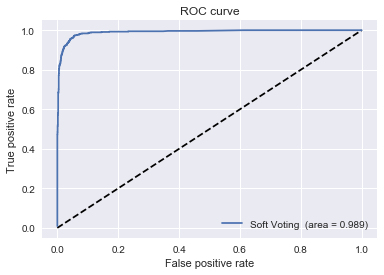

In [235]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dtree2, tpr_dtree2, label='Soft Voting  (area = {:.3f})'.format(auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

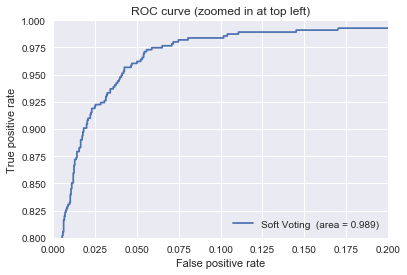

In [236]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dtree2, tpr_dtree2, label='Soft Voting  (area = {:.3f})'.format(auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

### Bagging and Pasting

In [24]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100,bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred_dtree = bag_clf.predict(X_test)

In [25]:
bag_clf.score(X_train, y_train)

0.9602878464818764

In [26]:
accuracy_score(y_test, y_pred_dtree)

0.9648312611012433

In [199]:
roc_auc_score(y_pred_dtree,y_test)

0.938587377110264

In [208]:
 print(metrics.classification_report(y_pred_dtree, y_test))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      2259
        1.0       0.90      0.90      0.90       556

avg / total       0.96      0.96      0.96      2815



In [27]:
bag_clf2 = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf2.fit(X_train, y_train)
y_pred_svm = bag_clf2.predict(X_test)

In [28]:
bag_clf2.score(X_train, y_train)

0.945184790334044

In [29]:
accuracy_score(y_test, y_pred_svm)

0.9502664298401421

In [204]:
from sklearn import metrics

In [205]:
print(metrics.classification_report(y_pred_svm, y_test))

             precision    recall  f1-score   support

        0.0       1.00      0.80      0.89      2815
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.80      0.89      2815



In [30]:
pasting_clf = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

pasting_clf.fit(X_train, y_train)
y_pred_knn= pasting_clf.predict(X_test)

In [31]:
pasting_clf.score(X_train, y_train)

0.8068585643212509

In [32]:
accuracy_score(y_test, y_pred_knn)

0.8028419182948491

In [209]:
 print(metrics.classification_report(y_pred_knn, y_test))

             precision    recall  f1-score   support

        0.0       1.00      0.80      0.89      2815
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.80      0.89      2815



In [33]:
pasting_clf2 = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

pasting_clf2.fit(X_train, y_train)
y_pred_log = pasting_clf2.predict(X_test)

In [34]:
pasting_clf2.score(X_train, y_train)

0.9388770433546553

In [35]:
accuracy_score(y_test, y_pred_log)

0.9403197158081705

In [197]:
roc_auc_score(y_pred_log,y_test)

0.9519967218601124

In [210]:
print(metrics.classification_report(y_pred_log, y_test))

             precision    recall  f1-score   support

        0.0       0.99      0.94      0.96      2402
        1.0       0.72      0.97      0.83       413

avg / total       0.95      0.94      0.94      2815



In [222]:
y_pred_svm2 = bag_clf2.predict_proba(X_test)[:, 1]
fpr_svm2, tpr_svm2, thresholds_svm2 = roc_curve(y_test, y_pred_svm2)
auc_svm2 = auc(fpr_svm2, tpr_svm2)

In [223]:
y_pred_dtree2 = bag_clf.predict_proba(X_test)[:, 1]
fpr_dtree2, tpr_dtree2, thresholds_dtree2 = roc_curve(y_test, y_pred_dtree2)
auc_dtree2 = auc(fpr_dtree2, tpr_dtree2)

In [224]:
y_pred_log2 = pasting_clf2.predict_proba(X_test)[:, 1]
fpr_log2, tpr_log2, thresholds_log2 = roc_curve(y_test, y_pred_log2)
auc_log2 = auc(fpr_log2, tpr_log2)

In [225]:
y_pred_knn2 = pasting_clf.predict_proba(X_test)[:, 1]
fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_test, y_pred_knn2)
auc_knn2 = auc(fpr_knn2, tpr_knn2)

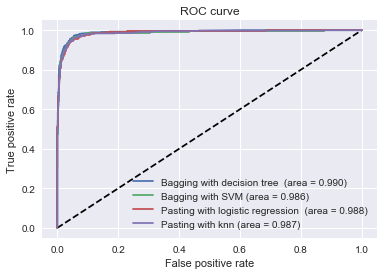

In [226]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dtree2, tpr_dtree2, label='Bagging with decision tree  (area = {:.3f})'.format(auc_dtree2))
plt.plot(fpr_svm2, tpr_svm2, label='Bagging with SVM (area = {:.3f})'.format(auc_svm2))
plt.plot(fpr_log2, tpr_log2, label='Pasting with logistic regression  (area = {:.3f})'.format(auc_log2))
plt.plot(fpr_knn2, tpr_knn2, label='Pasting with knn (area = {:.3f})'.format(auc_knn2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

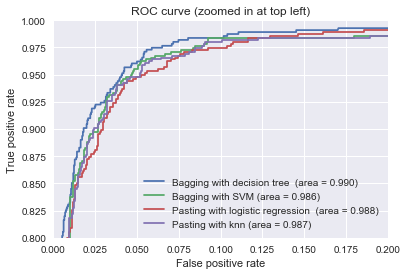

In [227]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dtree2, tpr_dtree2, label='Bagging with decision tree  (area = {:.3f})'.format(auc_dtree2))
plt.plot(fpr_svm2, tpr_svm2, label='Bagging with SVM (area = {:.3f})'.format(auc_svm2))
plt.plot(fpr_log2, tpr_log2, label='Pasting with logistic regression  (area = {:.3f})'.format(auc_log2))
plt.plot(fpr_knn2, tpr_knn2, label='Pasting with knn (area = {:.3f})'.format(auc_knn2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

### Adaboosting

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(dtree_clf)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [18]:
y_pred_dtree = ada_clf.predict(X_test)

In [19]:
ada_clf2 = AdaBoostClassifier(log_clf)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [20]:
y_pred_log = ada_clf2.predict(X_test)

In [21]:
print(metrics.classification_report(y_pred_log, y_test))

             precision    recall  f1-score   support

        0.0       1.00      0.81      0.90      2815
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.81      0.90      2815



###### AdaBoosting Classifier with Decision Tree Features

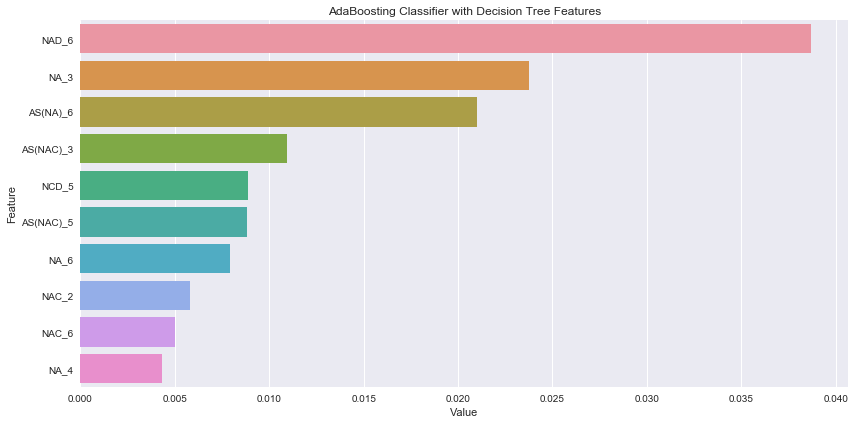

<Figure size 432x288 with 0 Axes>

In [22]:
feature_imp_ada = pd.DataFrame(sorted(zip(ada_clf.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('AdaBoosting Classifier with Decision Tree Features')
plt.tight_layout()
plt.show()
plt.savefig('ada_clf_importances-01.png')

### GradientBoosting

In [16]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=0, subsample=1.0, verbose=0, warm_start=False)

In [17]:
gbrt.train_score_ 
gbrt.loss_
gbrt.score(X_train, y_train) 

0.9685501066098081

In [18]:
# Evaluation of gbrt
y_pred_gbrt=gbrt.predict(X_test) 
roc_auc_score(y_pred_gbrt,y_test)

0.9517312043321835

In [21]:
print(metrics.classification_report(y_pred_gbrt, y_test))

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98      2299
        1.0       0.88      0.93      0.90       516

avg / total       0.97      0.96      0.96      2815



In [22]:
y_pred_gb = gbrt.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
auc_gb = auc(fpr_gb, tpr_gb)

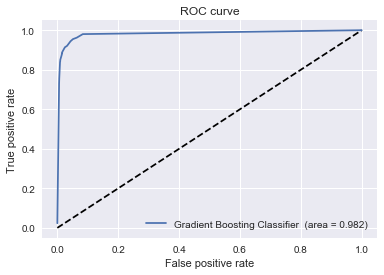

In [239]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting Classifier  (area = {:.3f})'.format(auc_gb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

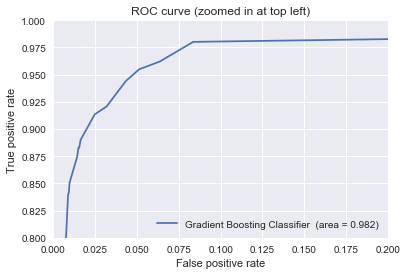

In [240]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting Classifier  (area = {:.3f})'.format(auc_gb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

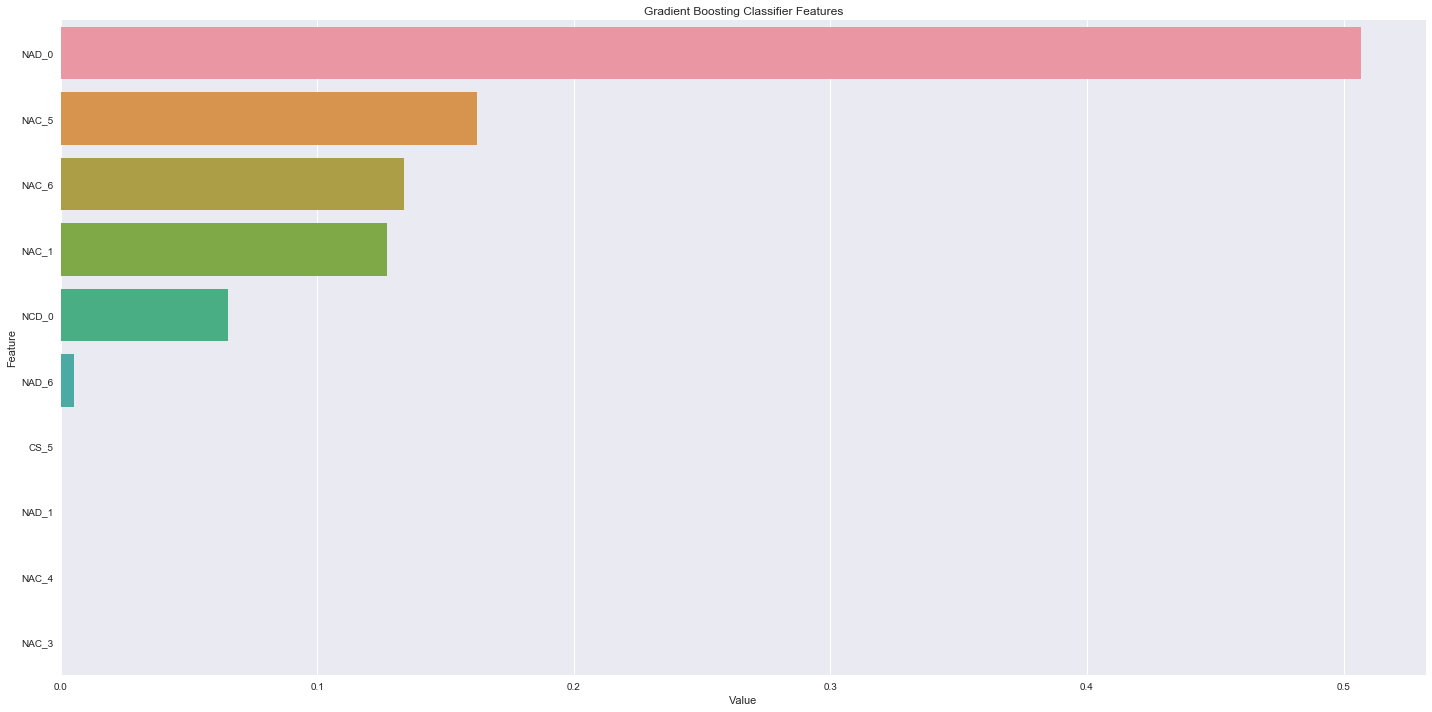

<Figure size 432x288 with 0 Axes>

In [28]:
feature_imp_gb = pd.DataFrame(sorted(zip(gbrt.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_gb.sort_values(by="Value", ascending=False).head(10))
plt.title('Gradient Boosting Classifier Features')
plt.tight_layout()
plt.show()
plt.savefig('gb_importances-01.png')

### PCA

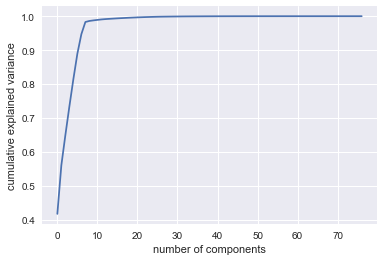

In [55]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

###### We see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 5 components to retain 90% of the variance.

In [56]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)  

In [57]:
print(pca.components_)

[[-1.19107993e-02 -1.20676871e-02 -1.59543710e-02 -1.34324721e-02
  -1.42657494e-02 -1.41940736e-02 -7.77695033e-03 -1.68486708e-02
  -1.81317261e-02 -1.82261226e-02 -1.83321067e-02 -1.88325065e-02
  -1.65101282e-02 -8.93305922e-03 -1.39107637e-02 -1.34851820e-02
  -1.14713708e-02 -1.48064299e-02 -1.53139294e-02 -1.36081177e-02
  -1.28256264e-02 -2.49057964e-01 -1.85555911e-01 -3.76325385e-01
  -3.36500304e-01 -3.16467154e-01 -1.89306511e-01 -9.11526165e-02
  -1.19860320e-02 -1.19955400e-02 -1.60039184e-02 -1.32697810e-02
  -1.40817269e-02 -1.44744505e-02 -7.97236369e-03 -1.44531499e-02
  -1.39249169e-02 -1.17346148e-02 -1.13954731e-02 -1.42249179e-02
  -1.39265523e-02 -1.22650520e-02 -2.46699068e-01 -1.84770851e-01
  -3.76603878e-01 -3.36929477e-01 -3.16865518e-01 -1.89417950e-01
  -8.89181124e-02 -6.62851316e-03 -9.40005517e-04 -4.38680237e-03
  -3.39425972e-03 -3.96289531e-03 -6.64778351e-03 -5.04016343e-05
  -1.55909794e-02 -1.47848050e-02 -1.57898066e-02 -1.66291533e-02
  -1.51412

In [58]:
print(pca.explained_variance_)

[0.52267744 0.17922203 0.11103473 0.10570435 0.10123212]


###### variance ratios for each principal component

In [59]:
explained_variance_ratio = pca.explained_variance_ratio_  
explained_variance_ratio 

array([0.41726671, 0.14307751, 0.08864186, 0.08438648, 0.08081618])

###### KNN

In [60]:
param_grid_knn = {'n_neighbors': [3,7,12,18,20,25,30,35,40,45,50]}

In [61]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, return_train_score=True,scoring='roc_auc')

In [62]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 7, 12, 18, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [63]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 40}
Best cross-validation score: 0.98


In [64]:
train_score_array = []
test_score_array = []

for k in range(1,50):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    x_axis = range(1,50)

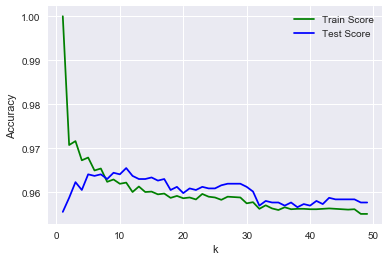

In [65]:
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [66]:
y_knn_predict = grid_search_knn.predict(X_test)
y_knn_train_predict = grid_search_knn.predict(X_train)

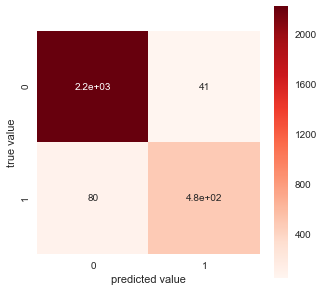

In [67]:
mat = confusion_matrix(y_test,y_knn_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [68]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.94 


In [106]:
report_table = [['knn', 'k = 40', grid_search_knn.score(X_train, y_train), grid_search_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test), np.mean(grid_search_knn.cv_results_['mean_train_score']),np.mean(grid_search_knn.cv_results_['mean_test_score']) ]]

###### Logistic Regression

In [69]:
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1','l2']}

In [70]:
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, return_train_score=True, scoring='roc_auc')

In [71]:
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [72]:
print("Best parameters: {}".format(grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logreg.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.99


In [73]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

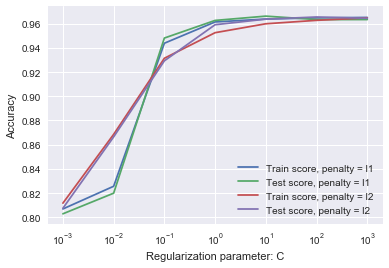

In [74]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [75]:
y_logreg_predict = grid_search_logreg.predict(X_test)
y_logreg_train_predict = grid_search_logreg.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_logreg_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_logreg_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


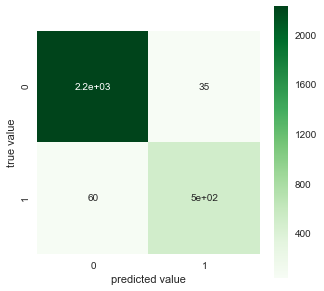

In [76]:
mat = confusion_matrix(y_test, y_logreg_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Greens')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [107]:
report_table = report_table + [['Logistic Regression', 'C = 10, penalty = l1', grid_search_logreg.score(X_train, y_train), grid_search_logreg.score(X_test, y_test), roc_auc_score(y_logreg_train_predict, y_train), roc_auc_score(y_logreg_predict, y_test),np.mean(grid_search_logreg.cv_results_['mean_train_score']),np.mean(grid_search_logreg.cv_results_['mean_test_score'])]]

###### Decision Tree

In [77]:
param_grid_dtree = {'criterion':['entropy','gini'],'max_depth': [3,5,8,15,20,25],'min_samples_split': [2,4,6,10],'min_samples_leaf':[2,4,6,10],'max_features':['auto','sqrt','log2'],'max_leaf_nodes': [5,10,15],
                  'min_impurity_decrease':[0.01,0.04]}

In [78]:
grid_search_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid_dtree, cv=5, return_train_score=True,scoring='roc_auc')

In [80]:
grid_search_dtree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 8, 15, 20, 25], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [5, 10, 15], 'min_impurity_decrease': [0.01, 0.04]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [81]:
print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.98


In [82]:
y_dtree_predict = grid_search_dtree.predict(X_test)
y_dtree_train_predict = grid_search_dtree.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dtree_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dtree_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.95 


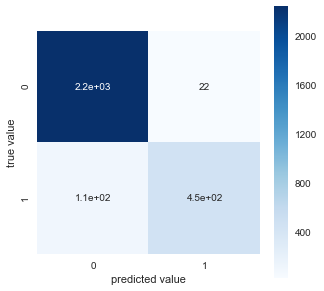

In [83]:
mat = confusion_matrix(y_test, y_dtree_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [108]:
report_table = report_table + [['Decision Tree', 'criterion= entropy, max_depth= 8, max_features= sqrt, max_leaf_nodes= 15, min_impurity_decrease= 0.01, min_samples_leaf= 10, min_samples_split= 2', grid_search_dtree.score(X_train, y_train), grid_search_dtree.score(X_test, y_test), roc_auc_score(y_dtree_train_predict, y_train), roc_auc_score(y_dtree_predict, y_test),np.mean(grid_search_dtree.cv_results_['mean_train_score']),np.mean(grid_search_dtree.cv_results_['mean_test_score'])]]

###### Linear SVC

In [84]:
param_grid_lsvc = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  
              'loss': ['hinge','squared_hinge'],
              'max_iter': [10,100,1000,10000]}

In [85]:
grid_search_lsvc = GridSearchCV(LinearSVC(), param_grid_lsvc, cv=5, return_train_score=True,scoring='roc_auc')

In [86]:
grid_search_lsvc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [87]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 10, 'loss': 'squared_hinge', 'max_iter': 10000}
Best cross-validation score: 0.99


In [88]:
y_svc_lin_predict_train = grid_search_lsvc.predict(X_train)
y_svc_lin_predict = grid_search_lsvc.predict(X_test)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_svc_lin_predict_train, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_svc_lin_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


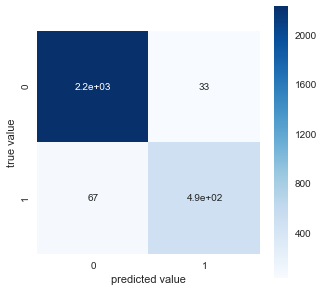

In [89]:
mat = confusion_matrix(y_test, y_svc_lin_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [109]:
report_table = report_table + [['LinearSVC', 'C = 10, loss = squared_hinge, max_iter = 10000', grid_search_lsvc.score(X_train, y_train), grid_search_lsvc.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test),np.mean(grid_search_lsvc.cv_results_['mean_train_score']),np.mean(grid_search_lsvc.cv_results_['mean_test_score'])]]

###### Kernel SVC

In [90]:
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [91]:
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, return_train_score=True,scoring='roc_auc')

In [92]:
grid_search_svc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [93]:
print("Best parameters: {}".format(grid_search_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.99


In [94]:
y_grid_search_svc_train = grid_search_svc.predict(X_train)
y_grid_search_svc = grid_search_svc.predict(X_test)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_grid_search_svc_train, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_grid_search_svc, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


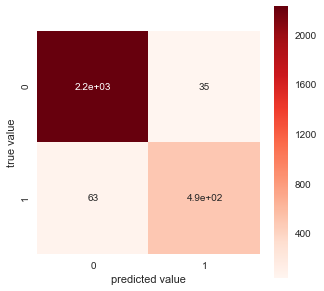

In [95]:
mat = confusion_matrix(y_test, y_grid_search_svc)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [110]:
report_table = report_table + [['SVC', 'C = 100 , gamma = 0.1', grid_search_svc.score(X_train, y_train), grid_search_svc.score(X_test, y_test), roc_auc_score(y_grid_search_svc_train, y_train), roc_auc_score(y_grid_search_svc, y_test),np.mean(grid_search_svc.cv_results_['mean_train_score']),np.mean(grid_search_svc.cv_results_['mean_test_score'])]]

In [111]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score','Mean train score','Mean test score'])

In [112]:
report=report.set_index('Model name')

###### The below report table displays the best parameters for different classification models along with their accuracy and roc_auc scores for both train and test datasets. Since this is a biased dataset, we are considering the roc_auc scores to evaluate the best model.

In [113]:
report

,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score,Mean train score,Mean test score
Model name,,,,,,,
knn,k = 40,0.990427,0.986630,0.943979,0.942872,0.991730,0.977470
Logistic Regression,"C = 10, penalty = l1",0.990467,0.990310,0.951719,0.953852,0.930523,0.930050
Decision Tree,"criterion= entropy, max_depth= 8, max_features...",0.979514,0.982936,0.955272,0.953528,0.947496,0.944986
LinearSVC,"C = 10, loss = squared_hinge, max_iter = 10000",0.990158,0.990049,0.952369,0.953727,0.983539,0.983200
SVC,"C = 100 , gamma = 0.1",0.988483,0.988927,0.950912,0.953026,0.980737,0.976249


###### Based on the roc_auc scores above, we find that the train and test score is closest for linearSVC. Thus we determine linearSVC to be the best classification model for this dataset after applying PCA on data.

###### Scores report for different models before applying PCA

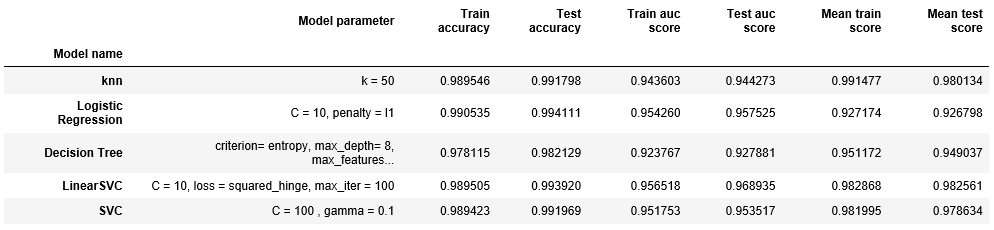

In [128]:
i = Image(filename='score.PNG')
i

###### Comparing both the tables we find tha train and test roc_auc scores have improved for most of the models after applying PCA on data. Also the train and test scores are closer. 

### Neural Network

In [154]:
BATCH_SIZE = 36
EPOCHS = 20
LEARNING_RATE = 0.0003

In [163]:
dense_model = Sequential()
dense_model.add(Dense(256, input_dim=77, activation='relu'))
dense_model.add(Dense(128, activation='softmax'))
dense_model.add(Dense(1, activation='sigmoid'))

In [172]:
dense_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[as_keras_metric(tf.metrics.auc)])

In [173]:
history=dense_model.fit(x=X_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    verbose=1, validation_data=(X_test, y_test))

Train on 11256 samples, validate on 2815 samples
Epoch 1/20
11256/11256 [==============================] - 6s 538us/step - loss: 0.1112 - auc: 0.9844 - val_loss: 0.1047 - val_auc: 0.9860
Epoch 2/20
11256/11256 [==============================] - 3s 282us/step - loss: 0.1080 - auc: 0.9864 - val_loss: 0.1018 - val_auc: 0.9870
Epoch 3/20
11256/11256 [==============================] - 3s 279us/step - loss: 0.1078 - auc: 0.9875 - val_loss: 0.1048 - val_auc: 0.9877
Epoch 4/20
11256/11256 [==============================] - 3s 289us/step - loss: 0.1075 - auc: 0.9874 - val_loss: 0.0985 - val_auc: 0.9873
Epoch 5/20
11256/11256 [==============================] - 3s 286us/step - loss: 0.1065 - auc: 0.9873 - val_loss: 0.1179 - val_auc: 0.9873
Epoch 6/20
11256/11256 [==============================] - 3s 290us/step - loss: 0.1070 - auc: 0.9872 - val_loss: 0.0975 - val_auc: 0.9871
Epoch 7/20
11256/11256 [==============================] - 3s 289us/step - loss: 0.1050 - auc: 0.9872 - val_loss: 0.0954 - v

In [174]:
dense_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               19968     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 52,993
Trainable params: 52,993
Non-trainable params: 0
_________________________________________________________________


In [175]:
dense_model.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_14',
    'trainable': True,
    'batch_input_shape': (None, 77),
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_15',
    'trainable': True,
    'units': 128,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Ze

In [176]:
y_pred_keras = dense_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [177]:
auc_keras = auc(fpr_keras, tpr_keras)

In [182]:
auc_keras

0.9908985091285977

In [179]:

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

###### ROC Plot of random forest and keras classifier

###### From the below plots we find that given the AUC metric, Keras classifier outperforms the random forest classifier 

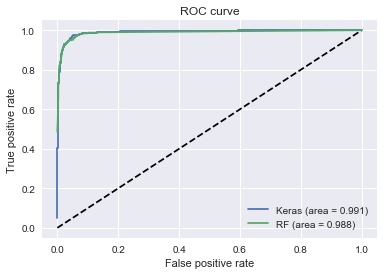

In [229]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

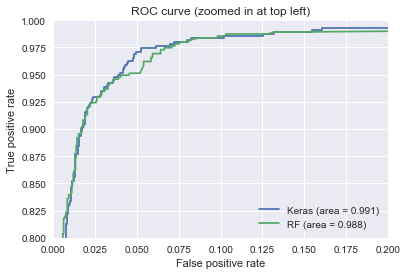

In [228]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()